# Genetic Optimization
## ML Forum 
### Taylor Hogan Dec-5-17

# Agenda
### Background
### Code Example
### Why, Why Not


![alt text](Genetic-Algorithm-Tree-Basic-steps-of-GA-selection-crossover-and-mutation.jpg "Logo Title Text 1")




In [77]:
from abc import ABCMeta, abstractmethod

class Individual () :
    __metaclass__ = ABCMeta
    
    score = -1.0
    
    @abstractmethod
    def mutate (self) : pass
    def fitness (self) : pass
    def mate (self, other) : pass
    def clone (self) : pass
 
   
    

In [78]:
def clone (individual : list) -> list :
    clone = []
    for i in range (len (individual)):
        clone.append (individual[i])
    return clone


In [79]:
import random
from typing import List

def mutate2 (individual : list, times : int = 1) -> list:
    mutant = clone (individual)
    size = len (individual)
    for i in range (times):       
        ith = int (random.random () * size)
        jth = int (random.random () * size)
        tmp = mutant[ith]
        mutant[ith] = mutant[jth]
        mutant[jth] = tmp
    return mutant
    
    
    

In [80]:
import random
from typing import List

def mutate1 (individual : list, times : int = 1) -> list:
    mutant = clone (individual)
    size = len (individual)
    for i in range (times):       
        ith = random.randint (0, size-1)
        jth = random.randint (0, size-1)
        tmp = mutant[ith]
        del(mutant[ith]);
        mutant.insert (jth, tmp)
        
    return mutant
    
    
    

In [81]:
def fitness (individual : list) -> float:
    fitness = 0
    size = len (individual)
    if (size <= 1):
        return 1.0
    for ith in range (size -1):
        if (individual[ith] <= individual[ith+1]):
            fitness += 1
        else :
            break
    return (fitness / (size-1))
    


In [82]:

def evolveOneGeneration (population :list )-> list :
    mF = mutate1
    nextGeneration =   list(map (mF, population))  
    population.extend (nextGeneration)
    population.sort
    return population
            
        

In [83]:
import random

def createOneRandom (chromosomeSize)->list:
    individual = []
    for i in range (chromosomeSize):
        individual.append (chromosomeSize-i)
    
    return individual
                           
        
    

In [91]:
populationSize = 30
chromosomeSize = 128
generations = 10000
population = []
stats = []


population.append (createOneRandom (chromosomeSize))
for i in range (populationSize-1):
    population.append (mutate1 (population[i], 100))

for generation in range (generations):
    newPopulation = evolveOneGeneration (population)
 
    newPopulation.sort (key = lambda individual: fitness (individual), reverse=True)

    population = newPopulation[:populationSize]
    stats.append (fitness (population[0]))
    



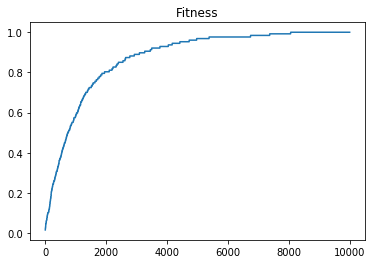

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,generations,1)
plt.plot(stats)
plt.title('Fitness')
plt.show()

